In [12]:
install.packages(c("readr", "dplyr", "ggplot2"))
library(readr)
library(dplyr)
library(ggplot2)

df <- read_csv("nhanes_cleaned.csv")
head(df)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 11933 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): married, edu_level, hepb_status, kidney_status
dbl (7): SEQN, age, sys_bp, dia_bp, vitd_status, sedentary_min, weight_self

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


SEQN,married,edu_level,age,sys_bp,dia_bp,vitd_status,hepb_status,kidney_status,sedentary_min,weight_self
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
130378,Married/Partnered,Bachelor+,43,132,94,1,Positive,No issue,360,190
130379,Married/Partnered,Bachelor+,66,113,76,1,Positive,No issue,480,220
130380,Married/Partnered,<Bachelor,44,104,76,1,Positive,No issue,240,150
130381,NA,NA,5,NA,NA,NA,Negative,No issue,NA,NA
130382,NA,NA,2,NA,NA,NA,Positive,No issue,NA,NA
130383,NA,NA,3,NA,NA,NA,Negative,No issue,NA,NA


In [13]:
library(tidyr)

# Keep only rows that have both variables
q1 <- df %>%
  select(married, edu_level) %>%
  drop_na()

# Create the contingency table
tab_q1 <- table(q1$married, q1$edu_level)
tab_q1


                   
                    <Bachelor Bachelor+
  Married/Partnered      2503      1631
  Not married            2648       990

In [14]:
chisq_result <- chisq.test(tab_q1)
chisq_result



	Pearson's Chi-squared test with Yates' continuity correction

data:  tab_q1
X-squared = 129.17, df = 1, p-value < 2.2e-16


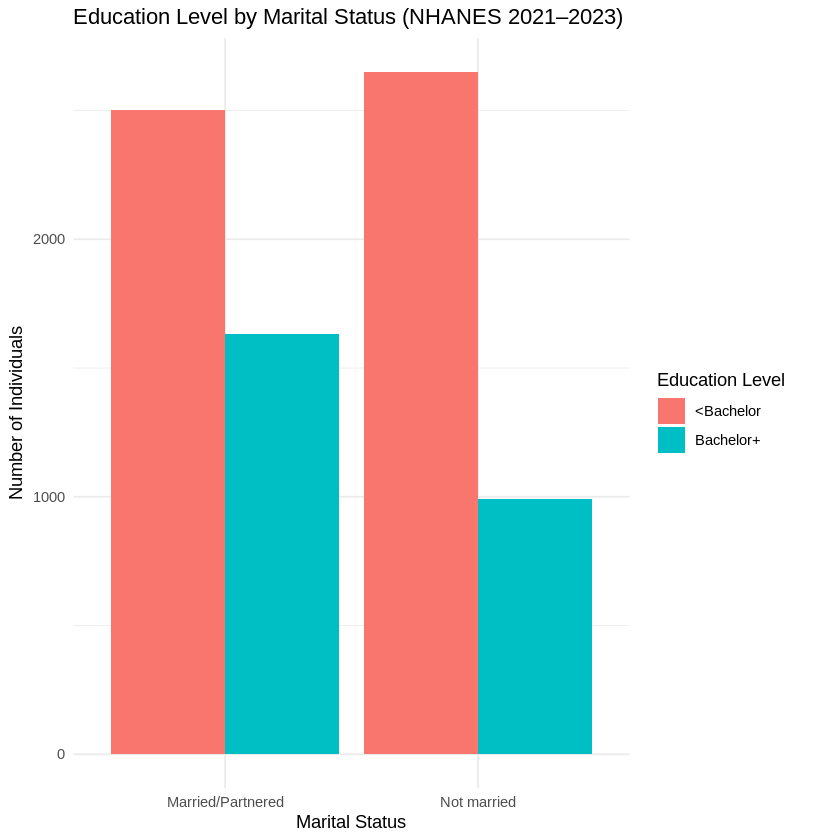

In [15]:
library(ggplot2)

df_q1 <- as.data.frame(tab_q1)
colnames(df_q1) <- c("marital_status", "education_level", "count")

ggplot(df_q1, aes(x = marital_status, y = count, fill = education_level)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Education Level by Marital Status (NHANES 2021–2023)",
    x = "Marital Status",
    y = "Number of Individuals",
    fill = "Education Level"
  ) +
  theme_minimal()


In [16]:
# Keep only relevant, non-missing values
q2 <- df %>%
  select(married, sedentary_min) %>%
  drop_na()

# Split into two groups
married_group <- q2$sedentary_min[q2$married == "Married/Partnered"]
notmarried_group <- q2$sedentary_min[q2$married == "Not married"]

# Independent-samples t-test (Welch version)
t_result <- t.test(married_group, notmarried_group, var.equal = FALSE)

# Display group means and test result
mean(married_group); mean(notmarried_group)
t_result

[1] 353.2871

[1] 371.9575


	Welch Two Sample t-test

data:  married_group and notmarried_group
t = -3.8514, df = 7398.8, p-value = 0.0001184
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -28.173263  -9.167526
sample estimates:
mean of x mean of y 
 353.2871  371.9575 


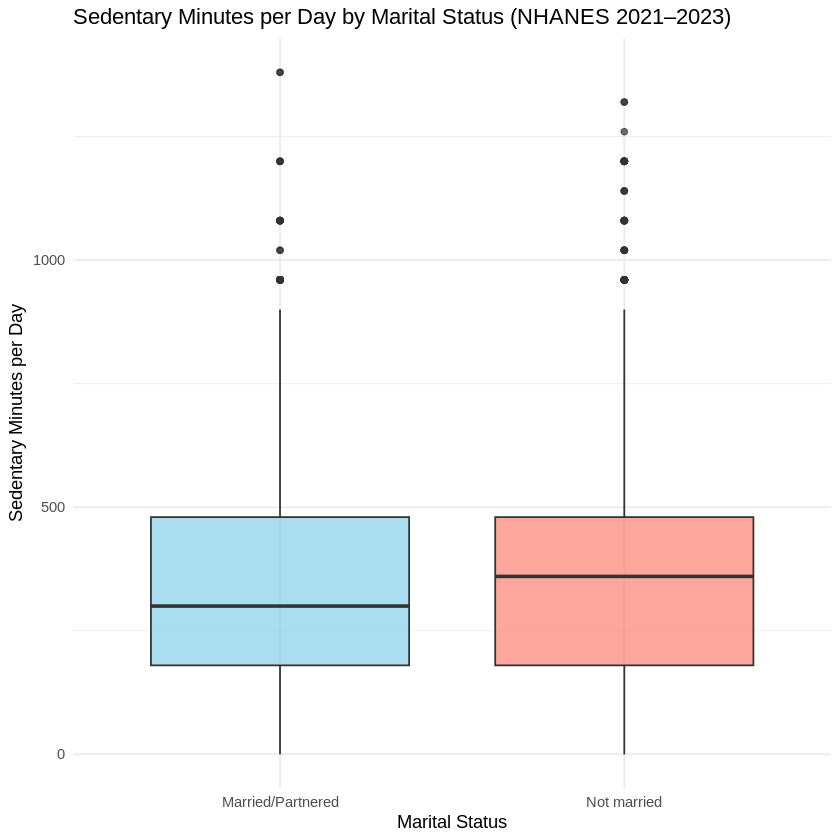

In [17]:
ggplot(q2, aes(x = married, y = sedentary_min, fill = married)) +
  geom_boxplot(alpha = 0.7) +
  scale_fill_manual(values = c("skyblue", "salmon")) +
  labs(
    title = "Sedentary Minutes per Day by Marital Status (NHANES 2021–2023)",
    x = "Marital Status",
    y = "Sedentary Minutes per Day"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

In [18]:
# Keep only relevant and complete data
q3 <- df %>%
  select(sys_bp, age, married) %>%
  drop_na()

# Run the regression model
model_q3 <- lm(sys_bp ~ age + married, data = q3)

# View results
summary(model_q3)


Call:
lm(formula = sys_bp ~ age + married, data = q3)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.251 -11.145  -1.461   9.380 106.126 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        100.81805    0.78468 128.483  < 2e-16 ***
age                  0.39524    0.01313  30.105  < 2e-16 ***
marriedNot married   1.34197    0.45086   2.976  0.00293 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.1 on 5835 degrees of freedom
Multiple R-squared:  0.1345,	Adjusted R-squared:  0.1342 
F-statistic: 453.3 on 2 and 5835 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


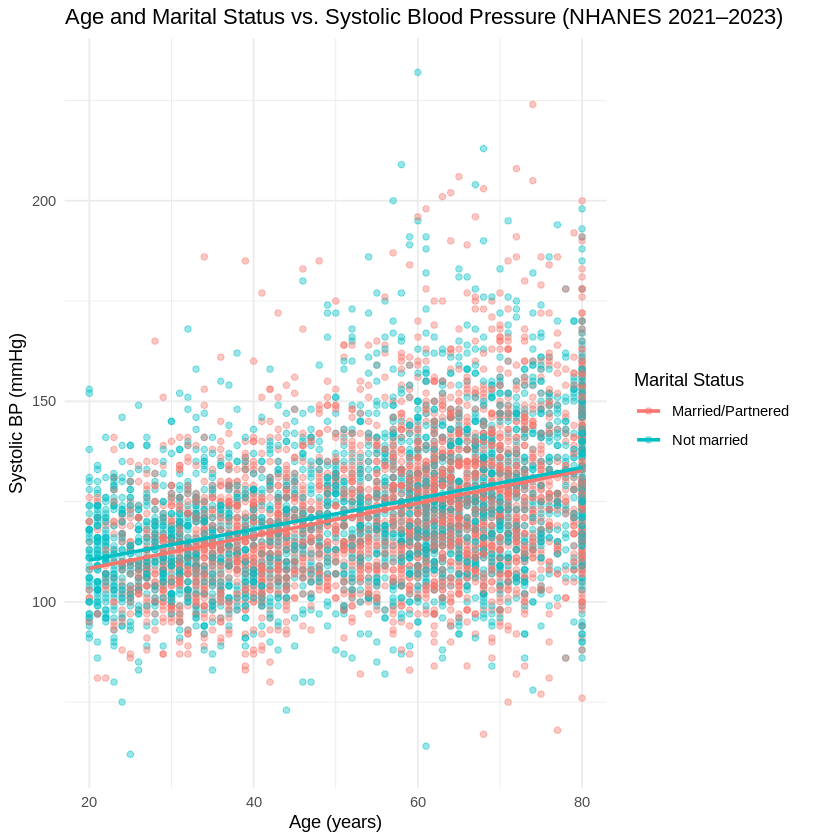

In [19]:
ggplot(q3, aes(x = age, y = sys_bp, color = married)) +
  geom_point(alpha = 0.4) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Age and Marital Status vs. Systolic Blood Pressure (NHANES 2021–2023)",
    x = "Age (years)",
    y = "Systolic BP (mmHg)",
    color = "Marital Status"
  ) +
  theme_minimal()

In [20]:
# Keeps only complete cases
q4 <- df %>%
  select(weight_self,sedentary_min) %>%
  drop_na()

# Run Pearson correlation test
cor_result <- cor.test(q4$weight_self, q4$sedentary_min, method = "pearson")

# View output
cor_result


	Pearson's product-moment correlation

data:  q4$weight_self and q4$sedentary_min
t = 14.081, df = 7952, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1344554 0.1773405
sample estimates:
      cor 
0.1559715 


`geom_smooth()` using formula = 'y ~ x'


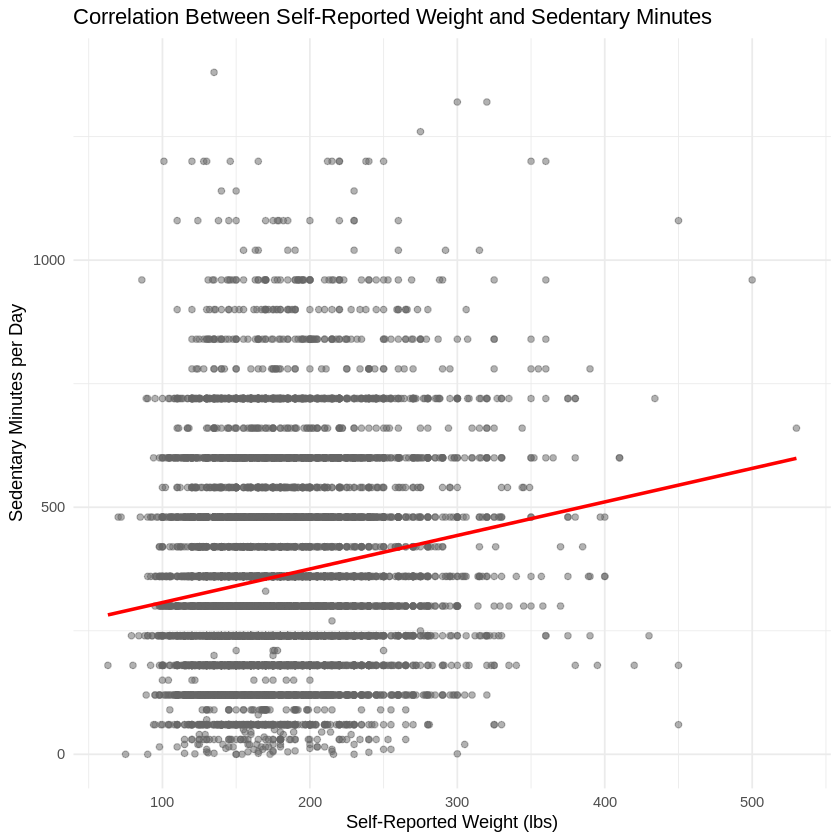

In [21]:
ggplot(q4, aes(x = weight_self, y = sedentary_min)) +
  geom_point(alpha = 0.5, color = "gray40") +
  geom_smooth(method = "lm", se = FALSE, color = "red", linewidth = 1) +
  labs(
  title = "Correlation Between Self-Reported Weight and Sedentary Minutes",
  x = "Self-Reported Weight (lbs)",
  y = "Sedentary Minutes per Day"
  ) +
  theme_minimal()

In [23]:
# Keeping only relevant and complete data
q5 <- df %>%
  select(kidney_status ,sys_bp) %>%
  drop_na()

# Split into 2 groups
weak     <- q5$sys_bp[q5$kidney_status == "Weak/Failing"]
healthy  <- q5$sys_bp[q5$kidney_status == "No issue"]

# Independent-samples t-test (Welch’s)
t_result_q5 <- t.test(weak, healthy, var.equal = FALSE)

# Show group means and test result
mean(weak); mean(healthy)
t_result_q5

[1] 126.8959

[1] 118.6747


	Welch Two Sample t-test

data:  weak and healthy
t = 5.2887, df = 228.64, p-value = 2.877e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  5.15824 11.28412
sample estimates:
mean of x mean of y 
 126.8959  118.6747 


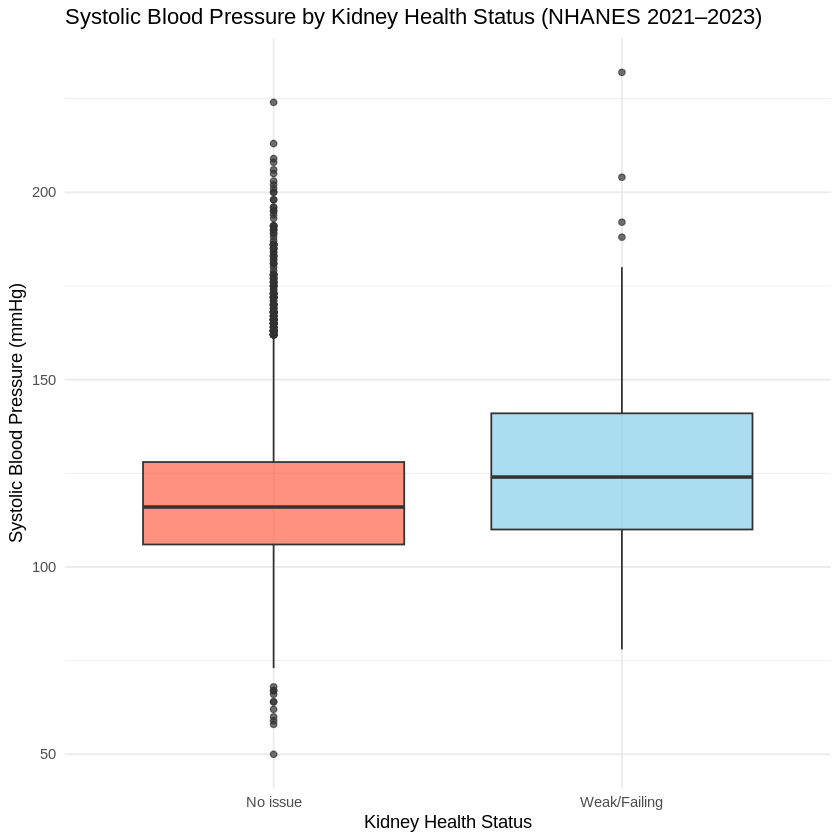

In [24]:
ggplot(q5, aes(x = kidney_status, y = sys_bp, fill = kidney_status)) +
  geom_boxplot(alpha = 0.7) +
  scale_fill_manual(values = c("tomato", "skyblue")) +
  labs(
    title = "Systolic Blood Pressure by Kidney Health Status (NHANES 2021–2023)",
    x = "Kidney Health Status",
    y = "Systolic Blood Pressure (mmHg)"
  ) +
  theme_minimal() +
  theme(legend.position = "none")